In [3]:
import numpy as np
import trimesh
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs
from scipy.sparse import spdiags
%load_ext autoreload
%autoreload 2
import os

Question 1 - 1 normal curvature

99
100
(486, 2)


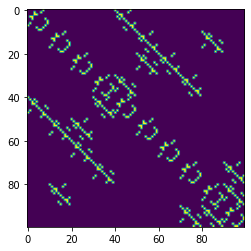

In [246]:
#M1 = trimesh.load("lilium_s.obj")
M1 = trimesh.load("plane.obj")
num1 = M1.vertices.shape[0]
Vert_1 = M1.vertices[:,:]
e_1 = M1.edges[:,:]

vert_table = np.zeros((num1,num1))
for i in range(e_1.shape[0]):
    current_edge = e_1[i,:]
    vert_table[current_edge[0],current_edge[1]] = 1
    vert_table[current_edge[1],current_edge[0]] = 1
plt.imshow(vert_table)

In [247]:
C = vert_table
M = np.zeros((num1,num1))
for i in range(num1):
    valence = np.sum(C[i,:])
    C[i,i]= -valence
    M[i,i]= 1.0/valence


In [248]:
Mean_curvature = M@C@Vert_1

Mean_curvature = np.linalg.norm(Mean_curvature,axis = 1)
Mean_curvature *= 0.5
print(Mean_curvature)

[1.57133269e-02 9.31685674e-03 9.31696854e-03 9.31680084e-03
 9.31685674e-03 1.17849952e-02 9.31696854e-03 9.31696854e-03
 9.31680084e-03 9.31680084e-03 9.31685674e-03 6.93889390e-18
 1.66666667e-07 1.66666667e-07 1.46733068e-17 9.31685674e-03
 1.66666667e-07 1.66666667e-07 1.66666667e-07 1.66666667e-07
 9.31680084e-03 1.66666667e-07 2.35702260e-07 2.35702260e-07
 1.66666667e-07 9.31696854e-03 2.35702260e-07 2.35702260e-07
 2.35702260e-07 2.35702260e-07 9.31680084e-03 1.66666667e-07
 2.35702260e-07 2.35702260e-07 1.66666667e-07 9.31696854e-03
 2.35702260e-07 2.35702260e-07 2.35702260e-07 2.35702260e-07
 9.31696854e-03 1.66666667e-07 2.35702260e-07 2.35702260e-07
 1.66666667e-07 9.31680084e-03 2.35702260e-07 2.35702260e-07
 2.35702260e-07 2.35702260e-07 9.31696854e-03 1.66666667e-07
 2.35702260e-07 2.35702260e-07 1.66666667e-07 9.31680084e-03
 2.35702260e-07 2.35702260e-07 2.35702260e-07 2.35702260e-07
 1.17849952e-02 9.31685674e-03 9.31680084e-03 9.31696854e-03
 9.31685674e-03 1.571332

In [10]:
def fit_range(min_,max_,a,b,x):
    x = ((b-a)*(x - min_))/(max_ - min_)
    return x

In [250]:
c2 = np.zeros((num1,3))
c2[:,2] = fit_range(np.min(Mean_curvature),np.max(Mean_curvature),0.0,1.0,Mean_curvature)
M1.visual.vertex_colors= c2
M1.export('plane_1.obj')

'# https://github.com/mikedh/trimesh\nv 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.20000000 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.13333300 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.16666700 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.10000000 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.30000000 0.00000000 0.00000000 0.00000000 0.74901961\nv 0.00000000 0.23333300 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.03333300 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.06666700 0.00000000 0.00000000 0.00000000 0.59215686\nv 0.00000000 0.26666700 0.00000000 0.00000000 0.00000000 0.59215686\nv -0.20000000 0.00000000 0.00000000 0.00000000 0.00000000 0.59215686\nv -0.20000000 0.20000000 0.00000000 0.00000000 0.00000000 0.00000000\nv -0.20000000 0.13333300 0.00000000 0.00000000 0.00000000 0.00000000\nv -0.20000000 0.16666700 0.00000000 0.00000000 0.00000000 0.00

Question 1 - 2 Gaussian Curvature

In [6]:
import math
def distance(p1, p2):
    return np.linalg.norm(p1-p2)
def area(a, b, c):
    side_a = distance(a, b)
    side_b = distance(b, c)
    side_c = distance(c, a)
    s = 0.5 * ( side_a + side_b + side_c)
    return math.sqrt(s * (s - side_a) * (s - side_b) * (s - side_c))

In [251]:
faces = M1.faces[:,:]
face_angles = M1.face_angles[:,:]

angles = np.zeros(num1)
face_areas = np.zeros(num1)

for i in range(faces.shape[0]):
    for j in range(3):
        vertex_index = faces[i,j]
       
        angles[vertex_index] += face_angles[i,j]

        a = Vert_1[faces[i,0],:]
        b = Vert_1[faces[i,1],:]
        c = Vert_1[faces[i,2],:]
        face_areas[vertex_index]+=area(a,b,c)
    

'''face_areas = np.zeros(faces.shape[0])
for i in range(faces.shape[0]):
    a = Vert_1[faces[i,0],:]
    b = Vert_1[faces[i,1],:]
    c = Vert_1[faces[i,2],:]
    face_areas[i]=area(a,b,c)'''
    


#areas = np.sum(face_areas,axis = 0)
print(face_areas.shape)
#print(2*3.1415926 - angles)
Gaussian_curvature =(2*3.14159 - angles)/(face_areas/3.0)
print(Gaussian_curvature)

for i in range(Gaussian_curvature.shape[0]):
    if(Gaussian_curvature[i]>10):
        Gaussian_curvature[i] =10

(100,)
[ 1.27236904e+04  5.65497032e+03  5.65485722e+03  5.65491377e+03
  5.65497032e+03  2.54473808e+04  5.65485722e+03  5.65485722e+03
  5.65491377e+03  5.65491377e+03  5.65497032e+03 -4.77655716e-03
 -4.77648551e-03 -4.77648551e-03 -4.77655716e-03  5.65497032e+03
 -4.77648551e-03 -4.77648551e-03 -4.77648551e-03 -4.77648551e-03
  5.65491377e+03 -4.77648551e-03 -4.77641386e-03 -4.77641386e-03
 -4.77648551e-03  5.65485722e+03 -4.77641386e-03 -4.77641386e-03
 -4.77641386e-03 -4.77641386e-03  5.65491377e+03 -4.77648551e-03
 -4.77641386e-03 -4.77641386e-03 -4.77648551e-03  5.65485722e+03
 -4.77641386e-03 -4.77641386e-03 -4.77641386e-03 -4.77641386e-03
  5.65485722e+03 -4.77648551e-03 -4.77641386e-03 -4.77641386e-03
 -4.77648551e-03  5.65491377e+03 -4.77641386e-03 -4.77641386e-03
 -4.77641386e-03 -4.77641386e-03  5.65485722e+03 -4.77648551e-03
 -4.77641386e-03 -4.77641386e-03 -4.77648551e-03  5.65491377e+03
 -4.77641386e-03 -4.77641386e-03 -4.77641386e-03 -4.77641386e-03
  2.54473808e+04  

In [252]:
c2 = np.zeros((num1,3))
c2[:,2] = np.abs(Gaussian_curvature)

min_ = np.min(c2[:,2])
max_ = np.max(c2[:,2])
c2[:,2] = fit_range(min_,max_,0.0,1.0,c2[:,2])
M1.visual.vertex_colors = c2
print(min_,max_)

0.004776413863203809 10.0


In [253]:
M1.export('plane_2.obj')

'# https://github.com/mikedh/trimesh\nv 0.00000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.20000000 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.13333300 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.16666700 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.10000000 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.30000000 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.23333300 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.03333300 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.06666700 0.00000000 0.00000000 0.00000000 1.00000000\nv 0.00000000 0.26666700 0.00000000 0.00000000 0.00000000 1.00000000\nv -0.20000000 0.00000000 0.00000000 0.00000000 0.00000000 1.00000000\nv -0.20000000 0.20000000 0.00000000 0.00000000 0.00000000 0.00000000\nv -0.20000000 0.13333300 0.00000000 0.00000000 0.00000000 0.00000000\nv -0.20000000 0.16666700 0.00000000 0.00000000 0.00000000 0.00

Question 3

In [4]:
def find_common_triangle(vertex_1,vertex_2,table):
    #Find the triangles lists containing vertex_1 and vertex_2
    triangle_vert1 = table[:,vertex_1]
    triangle_vert2 = table[:,vertex_2]
    
    #Get triangle indices
    indices_1 = np.where(triangle_vert1 == 1)
    indices_2 = np.where(triangle_vert2 == 1)
    
    #Find common index(Normally should be two, if one is found, the edge between two vertex is a boundary)
    triangles = np.intersect1d(indices_1,indices_2)
    
    #returning -1 if it's boundary
    if(triangles.shape[0]==1):
        return np.array([-1,-1])
    
    #return triangle indices
    return triangles
def Get_LB(model):
    M1 = model

    num1 = M1.vertices.shape[0]
    Vert_1 = M1.vertices[:,:]
    faces = M1.faces[:,:]
    vert_table = np.zeros((num1,num1))

    e_1 = M1.edges[:,:]
    for i in range(e_1.shape[0]):
        current_edge = e_1[i,:]
        vert_table[current_edge[0],current_edge[1]] = 1
        vert_table[current_edge[1],current_edge[0]] = 1
    C = vert_table
    
    face_angles = M1.face_angles[:,:]
    face_areas = np.zeros(num1)


    for i in range(faces.shape[0]):
        for j in range(3):
            vertex_index = faces[i,j]
            a = Vert_1[faces[i,0],:]
            b = Vert_1[faces[i,1],:]
            c = Vert_1[faces[i,2],:]
            face_areas[vertex_index]+=area(a,b,c)

    vert_face_table = np.zeros((faces.shape[0],num1))

    for i in range(faces.shape[0]):
        for j in range(3):
            vertex_index = faces[i,j]
            vert_face_table[i,vertex_index] = 1

    cotan_C = np.zeros((num1,num1))
    for i in range(num1):
        for j in range(num1):

            #For each valance vertex
            if(C[i,j]>0): 
                triangles = find_common_triangle(i,j,vert_face_table)
                cotan = 0.0
                if(np.sum(triangles)>-1):
                #For each triangle
                    for k in range(triangles.shape[0]):
                        #For each point in the triangle
                        
                        for m in range(3):
                            current_vertex = faces[triangles[k],m]
                            
                            #Find the cotan angle
                            if (current_vertex != i and current_vertex != j):
                                angle = face_angles[triangles[k],m]
                                cotan += 1.0/np.tan(angle)
                        
                                #print(triangles,current_vertex,angle)
                cotan_C[i,j] = cotan

    for i in range(num1):
        for j in range(num1):
            if (i==j):
                cotan_C[i,j]= np.sum(cotan_C[i,:])*(-1.0)

    idx_y = [0]
    areas_ = face_areas/3.0
    areas_ = 1.0/areas_

    face_area_M = spdiags(areas_,idx_y, num1, num1).toarray()        

    Laplace_Beltrami_Opt = (0.5*face_area_M)@cotan_C
    
    return Laplace_Beltrami_Opt,areas_,cotan_C


In [12]:
M1 = trimesh.load("lilium_s.obj")
Vert_1 = M1.vertices[:,:]
num1 = Vert_1.shape[0]
LB_Curvature = 0.5*np.linalg.norm(Get_LB(M1)[0]@Vert_1,axis =1)

for i in range(num1):
    if (LB_Curvature[i]>3):
        LB_Curvature[i]=3

c2 = np.zeros((num1,3))
c2[:,2] = np.abs(LB_Curvature)
#print(LB_Curvature.shape,num1)
min_ = np.min(c2[:,2])
max_ = np.max(c2[:,2])
c2[:,2] = fit_range(min_,max_,0.0,1.0,c2[:,2])

M1.visual.vertex_colors = c2

M1.export('Q3_lilium.obj')

'# https://github.com/mikedh/trimesh\nv 0.07020800 -0.78323100 -0.17178700 0.00000000 0.00000000 0.72941176\nv -1.14995200 -0.74512500 -0.08744200 0.00000000 0.00000000 0.84705882\nv -0.11052800 0.53914300 0.00048300 0.00000000 0.00000000 1.00000000\nv -0.84518400 -0.50415400 0.04215200 0.00000000 0.00000000 0.37647059\nv -0.56192000 0.26660300 0.04433200 0.00000000 0.00000000 0.00784314\nv -0.13523200 0.25421600 -0.01258600 0.00000000 0.00000000 0.05098039\nv -0.38227200 -0.17789600 -0.11728400 0.00000000 0.00000000 0.37647059\nv -0.61612800 -0.61809300 -0.01184600 0.00000000 0.00000000 0.63921569\nv -0.02351100 -0.64100100 -0.09433900 0.00000000 0.00000000 0.70196078\nv -0.84008700 -0.25313300 0.02804400 0.00000000 0.00000000 0.60392157\nv 0.20458500 -0.63160800 -0.09343400 0.00000000 0.00000000 0.56862745\nv 0.30884100 -0.30939200 -0.16436600 0.00000000 0.00000000 0.43137255\nv -1.31509500 0.68092500 -0.34731400 0.00000000 0.00000000 0.52941176\nv -0.91919100 0.68678800 0.06757500 0

Question 4

In [13]:
Mesh = trimesh.load("armadillo.obj")
LB,M_inv,C = Get_LB(Mesh)

M = np.sqrt(M_inv) #M^-1/2
M = spdiags(M,[0],LB.shape[0],LB.shape[0]).toarray()  
M_ = spdiags(1.0/M_inv,[0],LB.shape[0],LB.shape[0]).toarray()  
delta = M@(0.5*C)@M
vals_5, vecs_5 = eigs(delta, k=5,which = 'SM')
print(vecs_5)
vals_15, vecs_15 = eigs(delta, k=15,which = 'SM')
M2 = Mesh.copy()
Vert_2 = M2.vertices[:,:]
print(np.sum(delta - delta.T))
def mesh_reconstruction(vert,eig_vector,M1,M2):
    x = np.reshape(vert[:,0],(1,-1))
    y =np.reshape(vert[:,1],(1,-1))
    z = np.reshape(vert[:,2],(1,-1))
    print(x.dot(eig_vector[:,1]))
    X_new = np.zeros((x.shape[1],1))
    Y_new = np.zeros((x.shape[1],1))
    Z_new = np.zeros((x.shape[1],1))
    eig_vector_ = M1@eig_vector
    for i in range(eig_vector.shape[1]):
        eig_vec = np.reshape(eig_vector_[:,i],(-1,1))
        
        X_new += np.sum(x@M2@eig_vec)*eig_vec
        Y_new += np.sum(y@M2@eig_vec)*eig_vec
        Z_new += np.sum(z@M2@eig_vec)*eig_vec
        print(np.sum(X_new))
    X_new = np.reshape(X_new,(-1,1))
    Y_new = np.reshape(Y_new,(-1,1))
    Z_new = np.reshape(Z_new,(-1,1))

    return np.hstack((X_new,Y_new,Z_new))

[[ 0.06205423+0.j -0.04500182+0.j -0.01276455+0.j -0.03167421+0.j
  -0.04665281+0.j]
 [ 0.05892063+0.j -0.04874934+0.j -0.00367265+0.j  0.00277325+0.j
  -0.07424088+0.j]
 [ 0.07750334+0.j -0.0490981 +0.j -0.01124781+0.j -0.02181372+0.j
  -0.07344352+0.j]
 ...
 [ 0.04125247+0.j  0.0485939 +0.j -0.04737458+0.j  0.00718293+0.j
  -0.00106784+0.j]
 [ 0.05053913+0.j -0.05872099+0.j -0.02827652+0.j -0.11493788+0.j
   0.09437917+0.j]
 [ 0.06676785+0.j  0.02233047+0.j  0.03293436+0.j  0.00669886+0.j
  -0.02698361+0.j]]
0.0


In [176]:
vert_M2 = mesh_reconstruction(Vert_2,vecs_15.real,M,M_)
print(vert_M2)

M2 = Mesh.copy()
M2.vertices = vert_M2

[0.34594929]
-0.17041941626649332
0.22987026855706122
1.2297830075742129
1.5167501183166958
1.4577566353076363
1.455355080902196
1.3114957168368329
1.249661030667975
1.3166957344950379
1.3768007779820173
1.379580825818134
1.3796434097506487
1.3744979413925589
1.3725614576782412
1.3960784505065944
[[ 0.14255489  0.24660491 -0.12188876]
 [-0.00531324  0.38147621 -0.08003839]
 [ 0.09939555  0.24727148 -0.19315252]
 ...
 [ 0.18314159 -0.24912167 -0.07686483]
 [ 0.33534593  0.20068882  0.1717989 ]
 [-0.12947323 -0.08605115 -0.12705896]]


In [177]:
M2.export('Q4_15.obj')

'# https://github.com/mikedh/trimesh\nv 0.14255489 0.24660491 -0.12188876\nv -0.00531324 0.38147621 -0.08003839\nv 0.09939555 0.24727148 -0.19315252\nv 0.08200315 0.04367690 -0.21237395\nv 0.20979918 -0.39021986 -0.07451184\nv 0.22192104 -0.55401581 -0.07802905\nv -0.09226170 -0.12818089 -0.15071436\nv 0.05127333 0.34205567 0.08609357\nv -0.07106527 0.19415039 0.14938371\nv 0.35994726 0.24673656 0.26654478\nv -0.17229360 -0.49135734 -0.10986806\nv -0.18014562 -0.38847479 -0.09425468\nv -0.00524627 -0.20938030 -0.25434448\nv 0.11916400 -0.20607365 -0.08417010\nv -0.26541418 0.11591497 -0.02345993\nv 0.33571091 0.20024982 0.16537169\nv -0.15199373 -0.10318228 -0.04020434\nv -0.08539058 -0.17275988 -0.04917055\nv 0.21667601 -0.48518558 -0.07693790\nv -0.16691725 -0.52362536 -0.11383514\nv -0.06995338 0.30637507 -0.18010208\nv 0.09705309 0.17682728 0.10726643\nv -0.21369478 0.12710719 0.03510259\nv 0.17582605 0.22834161 -0.03386768\nv 0.17459790 0.16443219 0.06417023\nv 0.06522083 0.179909

Question 5

In [33]:
M1 = trimesh.load("plane_ns.obj")
old = M1.copy()
new = M1.copy()
for i in range(5):
    verts = old.vertices[:,:]
    new.vertices = verts+0.00001*Get_LB(old)[0]@verts
    old = new.copy()
old.export('Q5_2_1.obj')

'# https://github.com/mikedh/trimesh\nv -0.20076016 0.19991466 0.01391295\nv -0.19998692 0.14646029 0.02316875\nv -0.19894988 0.17055704 0.02048096\nv -0.19844135 0.11694718 0.01662708\nv -0.19903772 0.25787840 0.01841789\nv -0.19945289 0.20890877 0.01358457\nv -0.19938404 0.17869351 0.01729424\nv -0.19935238 0.12317738 0.01775966\nv -0.20042862 0.24132198 0.01833474\nv -0.19922735 0.18851103 0.01507599\nv -0.20097692 0.13367840 0.01899518\nv -0.20050424 0.10695182 0.02024179\nv -0.19896776 0.24825418 0.01836191\nv -0.20041605 0.19509356 0.01638396\nv -0.19965404 0.16660748 0.01753534\nv -0.20140142 0.11359390 0.01822746\nv -0.19974674 0.25072173 0.01595828\nv -0.19888622 0.17440177 0.01688367\nv -0.19816559 0.11889451 0.02069250\nv -0.20022745 0.23604987 0.02070663\nv -0.20008982 0.18403889 0.01789443\nv -0.20051331 0.12822112 0.02122258\nv -0.20108356 0.15620211 0.02216772\nv -0.20122241 0.08888740 0.01028707\nv -0.19925443 0.24476531 0.02142955\nv -0.19997048 0.21602550 0.01632586\n

Question 6

In [28]:
M1 = trimesh.load("plane_ns.obj")
old= M1.copy()

for i in range(3):
    verts = old.vertices[:,:]
    LB,M_inv,C = Get_LB(old)
    M = 1.0/M_inv
    M = spdiags(M,[0],verts.shape[0],verts.shape[0]).toarray()  
    A = M - 0.0001*C
    b =M@verts
    result = sp.linalg.solve(A,b)
    
    old.vertices = result

[[ 1.8540160e+00  1.6256350e+01 -5.0883700e-01]
 [ 4.2133120e+00  1.4705475e+01 -2.4412000e-02]
 [ 2.9681280e+00  1.5331334e+01 -3.3503000e-02]
 ...
 [ 8.2901500e-01  1.4944790e+01 -1.0371000e-02]
 [ 1.9975270e+00  1.3659564e+01 -2.4027590e+00]
 [ 2.4261350e+00  1.6306229e+01 -7.5318300e-01]]


In [ ]:
old.export('Q6_plane_5_iter.obj')